# Iris, Wine Data -> GBM, XGBoost, Light GBM

In [1]:
from sklearn import datasets as d
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
import pandas as pd
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
import time
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## (1) Iris data -> GBM, XGBoost, Light GBM

In [2]:
# import iris data
iris = d.load_iris()
irisdf=pd.DataFrame(iris.data)
irisdf.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(irisdf, iris.target, test_size=0.3, random_state=0)

### Iris - GBM

- GBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :   ?   )[소수점 둘째자리까지]

In [11]:
# gbm
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

start_time=time.time()

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9778
GBM 수행 시간: 0.0 초


0.97

### Iris - XGBoost

- xgboostclassifier를 이용하여 iris data 분류 모델을 만들어 성능을 적고 ( 성능 :   ?   )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 순서대로 나열하라(? - ? - ? - ?)

In [16]:
# xgboostclassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="mlogloss",  verbose=True)
xgb_preds = xgb_wrapper.predict(X_test)


[0]	validation_0-mlogloss:0.972149
Will train until validation_0-mlogloss hasn't improved in 400 rounds.
[1]	validation_0-mlogloss:0.86552
[2]	validation_0-mlogloss:0.774727
[3]	validation_0-mlogloss:0.696876
[4]	validation_0-mlogloss:0.628888
[5]	validation_0-mlogloss:0.570194
[6]	validation_0-mlogloss:0.518079
[7]	validation_0-mlogloss:0.471988
[8]	validation_0-mlogloss:0.431305
[9]	validation_0-mlogloss:0.395777
[10]	validation_0-mlogloss:0.364261
[11]	validation_0-mlogloss:0.336251
[12]	validation_0-mlogloss:0.313779
[13]	validation_0-mlogloss:0.293827
[14]	validation_0-mlogloss:0.276098
[15]	validation_0-mlogloss:0.260358
[16]	validation_0-mlogloss:0.246295
[17]	validation_0-mlogloss:0.23379
[18]	validation_0-mlogloss:0.222625
[19]	validation_0-mlogloss:0.212674
[20]	validation_0-mlogloss:0.203833
[21]	validation_0-mlogloss:0.195984
[22]	validation_0-mlogloss:0.189713
[23]	validation_0-mlogloss:0.183499
[24]	validation_0-mlogloss:0.178616
[25]	validation_0-mlogloss:0.173712
[26]	v

[224]	validation_0-mlogloss:0.147107
[225]	validation_0-mlogloss:0.147314
[226]	validation_0-mlogloss:0.147525
[227]	validation_0-mlogloss:0.147732
[228]	validation_0-mlogloss:0.147941
[229]	validation_0-mlogloss:0.148263
[230]	validation_0-mlogloss:0.14847
[231]	validation_0-mlogloss:0.148676
[232]	validation_0-mlogloss:0.14888
[233]	validation_0-mlogloss:0.149086
[234]	validation_0-mlogloss:0.149289
[235]	validation_0-mlogloss:0.149609
[236]	validation_0-mlogloss:0.14981
[237]	validation_0-mlogloss:0.150013
[238]	validation_0-mlogloss:0.150213
[239]	validation_0-mlogloss:0.15053
[240]	validation_0-mlogloss:0.150714
[241]	validation_0-mlogloss:0.150911
[242]	validation_0-mlogloss:0.151225
[243]	validation_0-mlogloss:0.151421
[244]	validation_0-mlogloss:0.151733
[245]	validation_0-mlogloss:0.151914
[246]	validation_0-mlogloss:0.151994
[247]	validation_0-mlogloss:0.152086
[248]	validation_0-mlogloss:0.152166
[249]	validation_0-mlogloss:0.152476
[250]	validation_0-mlogloss:0.152555
[251]

In [18]:
print('성능 : ', accuracy_score(y_test , xgb_preds))

성능 :  0.9777777777777777


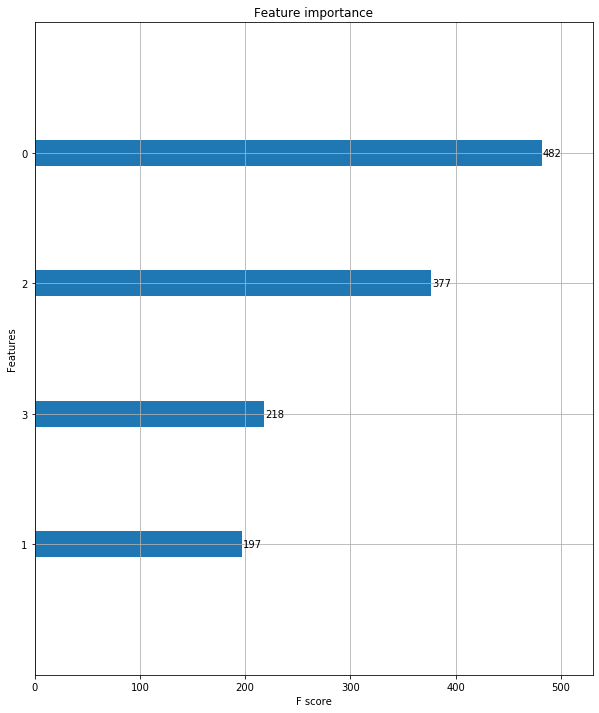

In [19]:
#plot_importance graph

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)


* 0.97
* 0-2-3-1

### Iris - Light GBM

- LightGBM을 이용하여 iris data 분류 모델을 만들었을 때 성능은? ( 성능 :  ?    )[소수점 둘째자리까지]

In [22]:
# lgbm
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
lgbm_preds = lgbm_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , lgbm_preds))

[1]	valid_0's multi_logloss: 0.996042
Training until validation scores don't improve for 400 rounds
[2]	valid_0's multi_logloss: 0.895604
[3]	valid_0's multi_logloss: 0.805055
[4]	valid_0's multi_logloss: 0.721716
[5]	valid_0's multi_logloss: 0.660824
[6]	valid_0's multi_logloss: 0.603757
[7]	valid_0's multi_logloss: 0.552827
[8]	valid_0's multi_logloss: 0.507972
[9]	valid_0's multi_logloss: 0.469133
[10]	valid_0's multi_logloss: 0.438146
[11]	valid_0's multi_logloss: 0.406554
[12]	valid_0's multi_logloss: 0.382297
[13]	valid_0's multi_logloss: 0.354661
[14]	valid_0's multi_logloss: 0.335554
[15]	valid_0's multi_logloss: 0.309733
[16]	valid_0's multi_logloss: 0.294557
[17]	valid_0's multi_logloss: 0.280683
[18]	valid_0's multi_logloss: 0.263716
[19]	valid_0's multi_logloss: 0.253011
[20]	valid_0's multi_logloss: 0.243123
[21]	valid_0's multi_logloss: 0.23013
[22]	valid_0's multi_logloss: 0.222587
[23]	valid_0's multi_logloss: 0.215531
[24]	valid_0's multi_logloss: 0.202896
[25]	valid_0

[273]	valid_0's multi_logloss: 0.386557
[274]	valid_0's multi_logloss: 0.387953
[275]	valid_0's multi_logloss: 0.388938
[276]	valid_0's multi_logloss: 0.390225
[277]	valid_0's multi_logloss: 0.391163
[278]	valid_0's multi_logloss: 0.392689
[279]	valid_0's multi_logloss: 0.393997
[280]	valid_0's multi_logloss: 0.39493
[281]	valid_0's multi_logloss: 0.397508
[282]	valid_0's multi_logloss: 0.398804
[283]	valid_0's multi_logloss: 0.399753
[284]	valid_0's multi_logloss: 0.400629
[285]	valid_0's multi_logloss: 0.401939
[286]	valid_0's multi_logloss: 0.402887
[287]	valid_0's multi_logloss: 0.404907
[288]	valid_0's multi_logloss: 0.406236
[289]	valid_0's multi_logloss: 0.407187
[290]	valid_0's multi_logloss: 0.409195
[291]	valid_0's multi_logloss: 0.41053
[292]	valid_0's multi_logloss: 0.411505
[293]	valid_0's multi_logloss: 0.41351
[294]	valid_0's multi_logloss: 0.414855
[295]	valid_0's multi_logloss: 0.415832
[296]	valid_0's multi_logloss: 0.416703
[297]	valid_0's multi_logloss: 0.418642
[29

0.97

## (2) wine data -> GBM, XGBoost, Light GBM

In [23]:
# import wine data
wine = d.load_wine()
winedf=pd.DataFrame(wine.data)
winedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
# Train, test set split
X_train, X_test, y_train, y_test = ms.train_test_split(winedf, wine.target, test_size=0.3, random_state=0)

### Wine - GBM

- GBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 : ?    )[소수점 둘째자리까지]

In [25]:
# gbm

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

start_time=time.time()

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9630
GBM 수행 시간: 0.0 초


0.96

### Wine - XGBoost

- xgboostclassifier를 이용하여 wine data 분류 모델을 만들어 성능을 적고 ( 성능 : ?     )[소수점 둘째자리까지]
- plot_importance를 사용하여 중요한 피처 4개를 순서대로 나열하라(?-?-?-?)

In [30]:
# xgboostclassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="mlogloss",  verbose=True)
xgb_preds = xgb_wrapper.predict(X_test)

print('성능 : ', accuracy_score(y_test , xgb_preds))

[0]	validation_0-mlogloss:0.97868
Will train until validation_0-mlogloss hasn't improved in 400 rounds.
[1]	validation_0-mlogloss:0.884696
[2]	validation_0-mlogloss:0.803847
[3]	validation_0-mlogloss:0.729879
[4]	validation_0-mlogloss:0.66679
[5]	validation_0-mlogloss:0.613629
[6]	validation_0-mlogloss:0.565266
[7]	validation_0-mlogloss:0.521635
[8]	validation_0-mlogloss:0.481281
[9]	validation_0-mlogloss:0.446401
[10]	validation_0-mlogloss:0.415522
[11]	validation_0-mlogloss:0.387958
[12]	validation_0-mlogloss:0.364007
[13]	validation_0-mlogloss:0.342541
[14]	validation_0-mlogloss:0.322741
[15]	validation_0-mlogloss:0.305223
[16]	validation_0-mlogloss:0.289273
[17]	validation_0-mlogloss:0.275719
[18]	validation_0-mlogloss:0.26347
[19]	validation_0-mlogloss:0.250706
[20]	validation_0-mlogloss:0.240992
[21]	validation_0-mlogloss:0.231796
[22]	validation_0-mlogloss:0.224526
[23]	validation_0-mlogloss:0.21675
[24]	validation_0-mlogloss:0.209522
[25]	validation_0-mlogloss:0.202891
[26]	val

[224]	validation_0-mlogloss:0.106319
[225]	validation_0-mlogloss:0.106319
[226]	validation_0-mlogloss:0.106319
[227]	validation_0-mlogloss:0.106319
[228]	validation_0-mlogloss:0.106319
[229]	validation_0-mlogloss:0.106319
[230]	validation_0-mlogloss:0.106319
[231]	validation_0-mlogloss:0.106319
[232]	validation_0-mlogloss:0.106319
[233]	validation_0-mlogloss:0.106319
[234]	validation_0-mlogloss:0.106319
[235]	validation_0-mlogloss:0.106319
[236]	validation_0-mlogloss:0.106319
[237]	validation_0-mlogloss:0.106319
[238]	validation_0-mlogloss:0.106319
[239]	validation_0-mlogloss:0.10632
[240]	validation_0-mlogloss:0.10632
[241]	validation_0-mlogloss:0.10632
[242]	validation_0-mlogloss:0.10632
[243]	validation_0-mlogloss:0.10632
[244]	validation_0-mlogloss:0.10632
[245]	validation_0-mlogloss:0.10632
[246]	validation_0-mlogloss:0.10632
[247]	validation_0-mlogloss:0.10632
[248]	validation_0-mlogloss:0.10632
[249]	validation_0-mlogloss:0.10632
[250]	validation_0-mlogloss:0.10632
[251]	validat

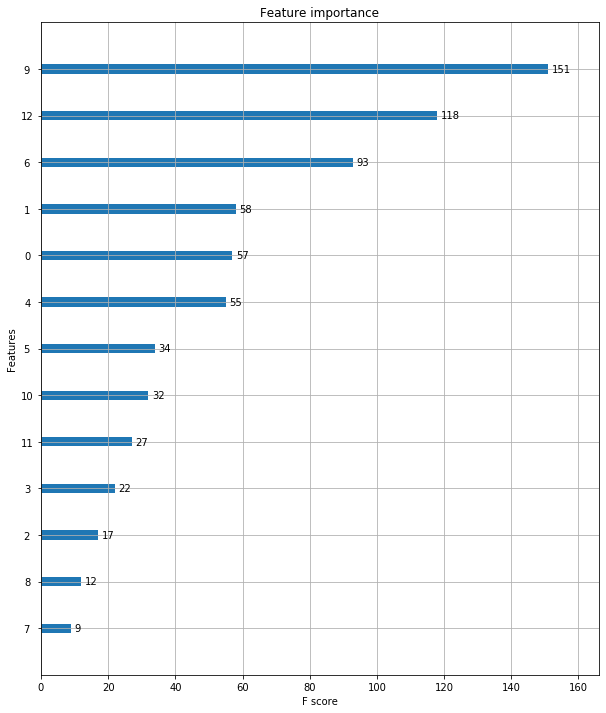

In [31]:
# plot_importance graph
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

* 0.96
* 9-12-6-1

### Wine - LightGBM

- LightGBM을 이용하여 wine data 분류 모델을 만들었을 때 성능은? ( 성능 :   ?   )[소수점 둘째자리까지]

In [32]:
# lgbm
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
lgbm_preds = lgbm_wrapper.predict(X_test)


print('성능 : ', accuracy_score(y_test , lgbm_preds))

[1]	valid_0's multi_logloss: 0.976016
Training until validation scores don't improve for 400 rounds
[2]	valid_0's multi_logloss: 0.888831
[3]	valid_0's multi_logloss: 0.816757
[4]	valid_0's multi_logloss: 0.752172
[5]	valid_0's multi_logloss: 0.696008
[6]	valid_0's multi_logloss: 0.645174
[7]	valid_0's multi_logloss: 0.600729
[8]	valid_0's multi_logloss: 0.560938
[9]	valid_0's multi_logloss: 0.524987
[10]	valid_0's multi_logloss: 0.494277
[11]	valid_0's multi_logloss: 0.461428
[12]	valid_0's multi_logloss: 0.436004
[13]	valid_0's multi_logloss: 0.41068
[14]	valid_0's multi_logloss: 0.38793
[15]	valid_0's multi_logloss: 0.367762
[16]	valid_0's multi_logloss: 0.346148
[17]	valid_0's multi_logloss: 0.326347
[18]	valid_0's multi_logloss: 0.310583
[19]	valid_0's multi_logloss: 0.294691
[20]	valid_0's multi_logloss: 0.280678
[21]	valid_0's multi_logloss: 0.268633
[22]	valid_0's multi_logloss: 0.255962
[23]	valid_0's multi_logloss: 0.24509
[24]	valid_0's multi_logloss: 0.234194
[25]	valid_0's

[260]	valid_0's multi_logloss: 0.179457
[261]	valid_0's multi_logloss: 0.179349
[262]	valid_0's multi_logloss: 0.179009
[263]	valid_0's multi_logloss: 0.178904
[264]	valid_0's multi_logloss: 0.178325
[265]	valid_0's multi_logloss: 0.178281
[266]	valid_0's multi_logloss: 0.178765
[267]	valid_0's multi_logloss: 0.178194
[268]	valid_0's multi_logloss: 0.178092
[269]	valid_0's multi_logloss: 0.178052
[270]	valid_0's multi_logloss: 0.177492
[271]	valid_0's multi_logloss: 0.177966
[272]	valid_0's multi_logloss: 0.177627
[273]	valid_0's multi_logloss: 0.177527
[274]	valid_0's multi_logloss: 0.177609
[275]	valid_0's multi_logloss: 0.177481
[276]	valid_0's multi_logloss: 0.177383
[277]	valid_0's multi_logloss: 0.177464
[278]	valid_0's multi_logloss: 0.177932
[279]	valid_0's multi_logloss: 0.177835
[280]	valid_0's multi_logloss: 0.177286
[281]	valid_0's multi_logloss: 0.177161
[282]	valid_0's multi_logloss: 0.17683
[283]	valid_0's multi_logloss: 0.176734
[284]	valid_0's multi_logloss: 0.176814
[

0.94